## Import Dependiency

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import numpy as np
import pandas as pd

## Read the csv file into a pandas DataFrame

In [2]:
# Read the csv file into a pandas DataFrame

health_data = pd.read_csv('../Resources/exercise.csv')
health_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
calories_data = pd.read_csv('../Resources/calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


## Merging Pandas dataframe

In [8]:
hdata=pd.merge( health_data,calories_data, on='User_ID')
hdata.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Assign X (data) and y (target)

In [12]:
### BEGIN SOLUTION
X = hdata[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Gender']]
y = hdata["Calories"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(15000, 7) (15000, 1)


## Encoding data in binary formet

In [16]:
data = X.copy()

data_binary_encoded = pd.get_dummies(hdata, columns=["Gender"])
data_binary_encoded.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


In [17]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


## Spliting Data into test and train

In [18]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
7410,49,173.0,76.0,25.0,109.0,40.8,0,1
10894,38,176.0,83.0,26.0,107.0,40.6,0,1
1934,58,172.0,77.0,6.0,80.0,39.3,0,1
11539,24,176.0,82.0,20.0,107.0,40.2,0,1
2952,70,180.0,77.0,9.0,100.0,40.0,0,1


## Scaling Data

In [19]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Plotting Data

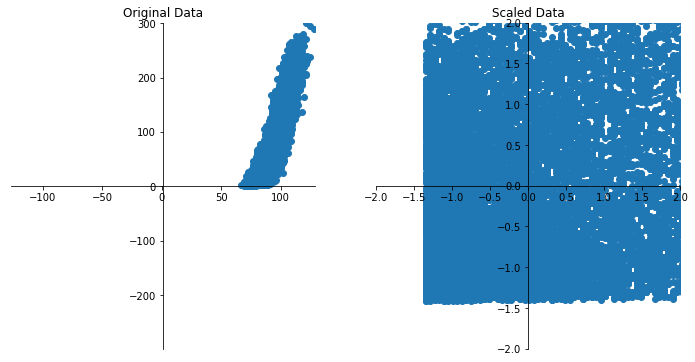

In [26]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Heart_Rate"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Heart_Rate"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

## Assign X (data) and y (target)

In [29]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = pd.get_dummies(hdata[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Gender']])
y = hdata["Calories"].values.reshape(-1, 1)
X.head()
### END SOLUTION

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Plot the results 

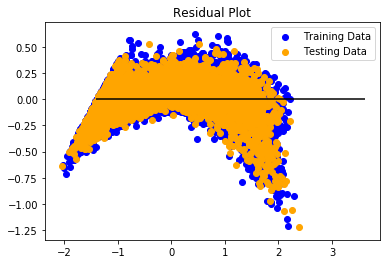

In [31]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [32]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03421222862931613, R2: 0.9664885791583727


## LASSO model
 * Note: Use an alpha of .01 when creating the model for this activity

In [33]:
### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.036961757254976406, R2: 0.9637953722384456


## Ridge model
* Note: Use an alpha of .01 when creating the model for this activity

In [34]:
### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.034212238485181325, R2: 0.9664885695043963


## ElasticNet model
 * Note: Use an alpha of .01 when creating the model for this activity


In [35]:
### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03574259328481438, R2: 0.9649895626936106
